# 1章 基本的な画像処理

## PIL

PIL(Python Imaging Library)、現在Python3ではPillowになった

画像の読み込み

In [10]:
from PIL import Image

# 画像の読み込み
img = Image.open('../imgs/inu.jpg')
# 画像の表示
img.show()

## PIL imageオブジェクトをnp.array()にする
RGBやグレースケールを、np.array型の行列で処理できるようにする

縦画素数、横画素数、RGB: (340, 510, 3)
[[192 192 191 ... 178 177 177]
 [189 190 190 ... 173 172 172]
 [190 191 192 ... 165 165 165]
 ...
 [195 200 205 ... 199 195 193]
 [197 202 208 ... 198 196 193]
 [196 202 209 ... 195 194 192]]


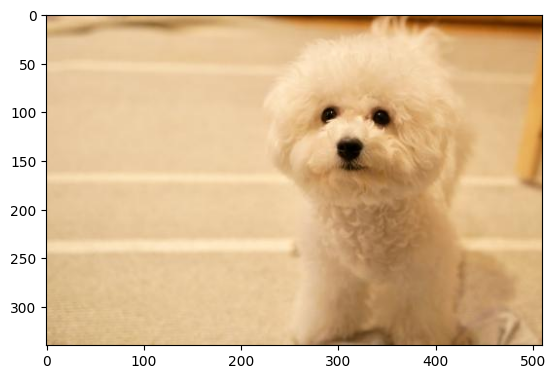

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#　画像データをnp.array型にする
# 縦画素数：arr[0], 横画素数：arr[1]
img = Image.open('../imgs/inu.jpg')
arr = np.array(img)
print(f'縦画素数、横画素数、RGB: {arr.shape}')

#グレイスケールでは0~255で量子化
print(arr[:,:,0])

# matplotlibでの表示
plt.imshow(img)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


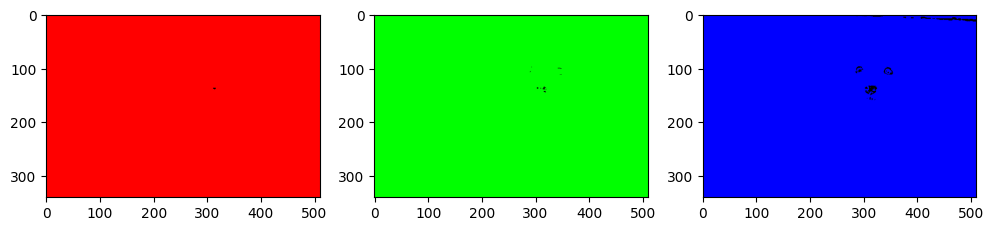

In [26]:
# RGBで３色に分解して表示
plt.figure(figsize = (12,12))

clist = ['r', 'g', 'b']
for i, c in enumerate(clist):
    mat = np.zeros(arr.shape)
    mat[:,:,i] = arr[:,:,i]
    plt.subplot(1,3,i+1)
    plt.imshow(mat)
    # plt.axis('off')
    # fname = 'data/inu_'+ str(c)+'.jpg'
    # plt.imsave(fname, mat)

(340, 510)


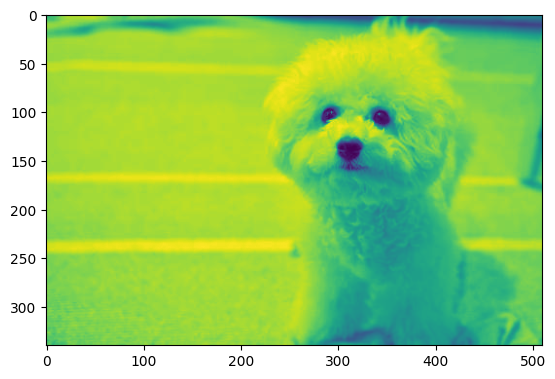

In [28]:
# グレイスケールの数値変換と表示
img = Image.open('../imgs/inu.jpg').convert('L')
arr_bw = np.array(img)
print(arr_bw.shape)

plt.imshow(arr_bw)

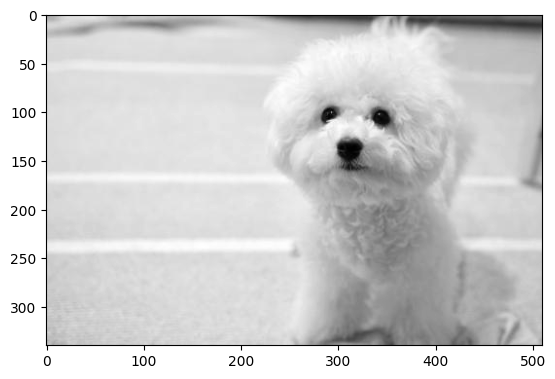

In [29]:
# デフォルトでは見にくいのでグレイスケールで表示
plt.gray()
plt.imshow(arr_bw)

## Matplotlibとの組み合わせ

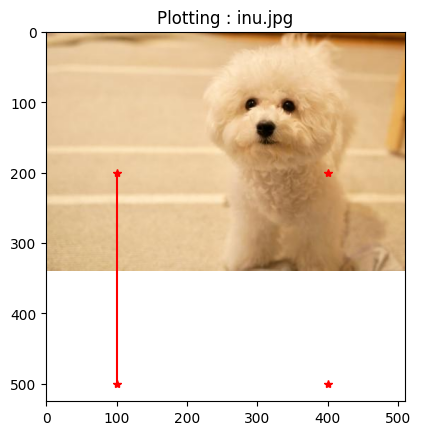

In [31]:
# 本
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

# 配列に画像を読み込む
img = np.array(Image.open('../imgs/inu.jpg'))

# 画像の表示
plt.imshow(img)

# 点の座標
x = [100, 100, 400, 400]
y = [200, 500, 200, 500]

# 赤い星の描画
plt.plot(x,y, 'r*')

# 最初の二点間に線を描画
plt.plot(x[:2],y[:2], 'r-')

# タイトルの追加と描画
plt.title('Plotting : inu.jpg')
plt.show()

### 画像の等高線とヒストグラム
グレースケールで行う

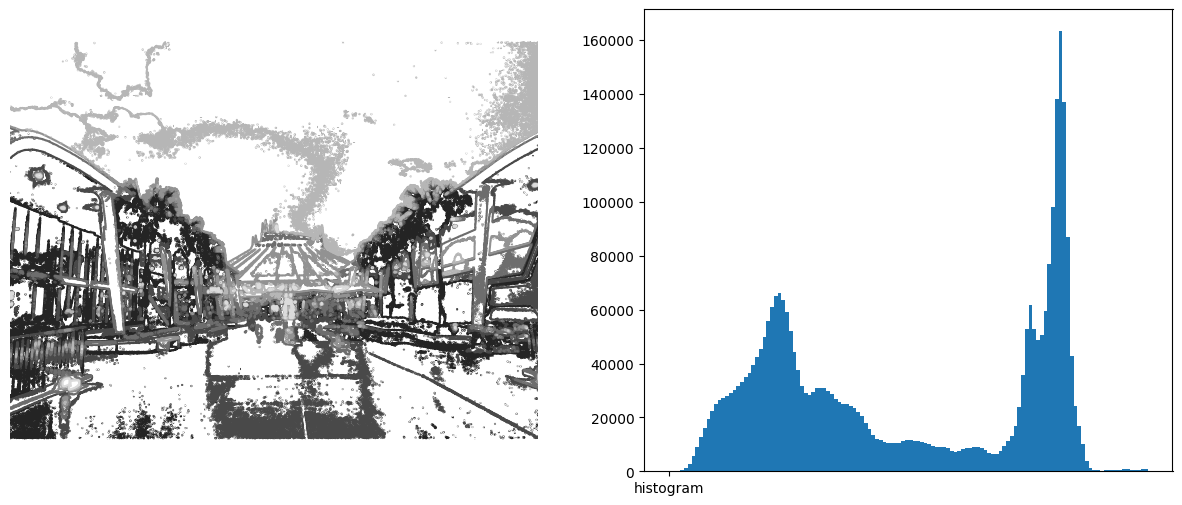

In [44]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img_arr = np.array(Image.open('../imgs/spaceMountain.jpeg').convert('L'))
# img_arr = np.array(Image.open('../imgs/inu.jpg').convert('L'))

plt.figure(figsize=(15,6))
plt.gray()

plt.subplot(1,2,1)
plt.contour(img_arr, origin='image')
plt.axis('equal')
plt.axis('off')


plt.subplot(1,2,2)
# 多次元配列を行方向に1次元の値に変換
plt.hist(img_arr.flatten(), 128)
plt.hist('histogram')

plt.show()

### インタラクティブな注釈

plt.ginput(): 簡単に点を挿入できる
**inlineではできない**

三点クリックしてください


/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_52030/1794215343.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  x = plt.ginput(3)


KeyboardInterrupt: 

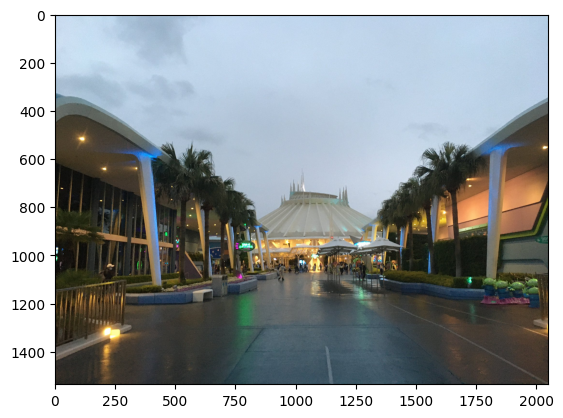

In [48]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = np.array(Image.open('../imgs/spaceMountain.jpeg'))
plt.imshow(img)
print('三点クリックしてください')
x = plt.ginput(3)

plt.show()

## Numpy

### 配列による画像表現

Numpyの配列は多次元で様々なものが表現できる配列  

In [51]:
# 画像での具体例

img = np.array(Image.open('../imgs/spaceMountain.jpeg'))
print(img.shape, img.dtype)

img = np.array(Image.open('../imgs/spaceMountain.jpeg').convert('L'),'f')
print(img.shape, img.dtype)


(1536, 2048, 3) uint8
(1536, 2048) float32


配列へのアクセス

```example.py
im[i,:] = im[j,:]   # j行の値をi行に代入
im[i,:] =  100      # i行の全ての値を100にする
```

### グレイスケールレベルの変換

画像のグレーレベルを変換する

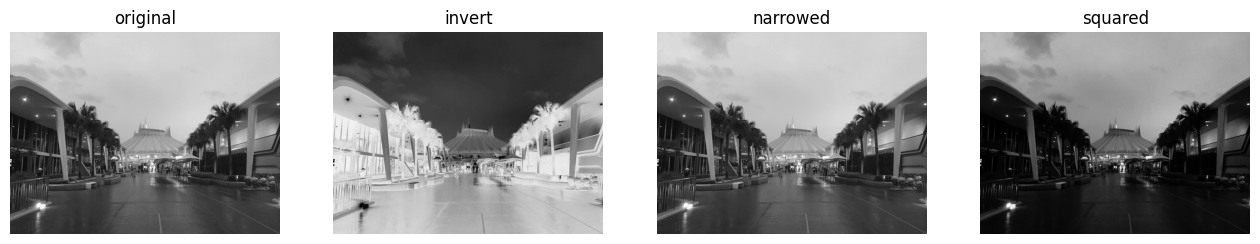

In [55]:
img = np.array(Image.open('../imgs/spaceMountain.jpeg').convert('L'))

# 画像を反転する
im2 = 255 - img

# 100~200の間に収める
im3 = (100.0/255)* img + 100

# 2条する
im4 = 255.0 * (img/250.0)**2

im_list = [img, im2, im3, im4]
tlist = ['original', 'invert', 'narrowed', 'squared']

plt.figure(figsize=(16,8))
plt.gray()

for i, im, t in zip(range(4), im_list, tlist):
    plt.subplot(1, 4, i+1)
    plt.imshow(im)
    plt.title(t)
    plt.axis('off')

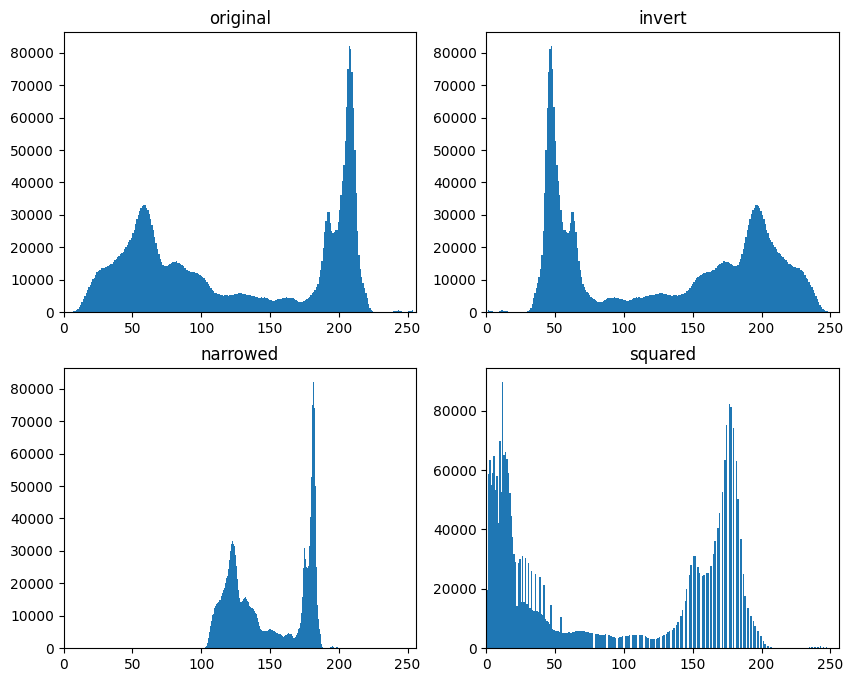

In [56]:
# テキストp.7の例にしたがって、ヒストグラムを書いてみる
plt.figure(figsize=(10,8))
plt.gray()
for i, image, t in zip(range(4), im_list, tlist):
    plt.subplot(2,2, i+1)
    plt.hist(image.flatten(), 256)
    plt.xlim(0,256)
    plt.title(t)

### 画像サイズの変更

配列のサイズを変えるのは大変  
PILの画像オブジェクト変換を用いてサイズを変換する関数を作る

In [57]:
# 画像変換関数
def imresize(im, sz):
    # PILを使ってサイズを変換
    pil_img = Image.fromarray(uint8(im))
    return array(pil_img.resize(sz))

### ヒストグラム平坦化
ヒストグラム平坦化：画像のグレーレベルのヒストグラムを全てのメイドができるかぎり同じ頻度になるように平坦化するもの

前処理として、明度を正規化したり、コントラストの向上したりするのによく用いられる

変換関数はピクセル値の累積分布関数

In [58]:
def histeq(im, nbr_bins=256):
    # グレースケールのヒストグラム平坦化
    imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)
    cdf = imhist.cumsum() # 累積分布関数
    cdf = 255 * cdf/ cdf[-1] #正規化

    # cdfを線形補間し、新しいピクセル値とする
    im2 = np.interp(im.flatten(), bins[:-1],cdf)
    return im2.reshape(im.shape), cdf

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_52030/2646837625.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  imhist, bins = np.histogram(im.flatten(), nbr_bins, normed=True)


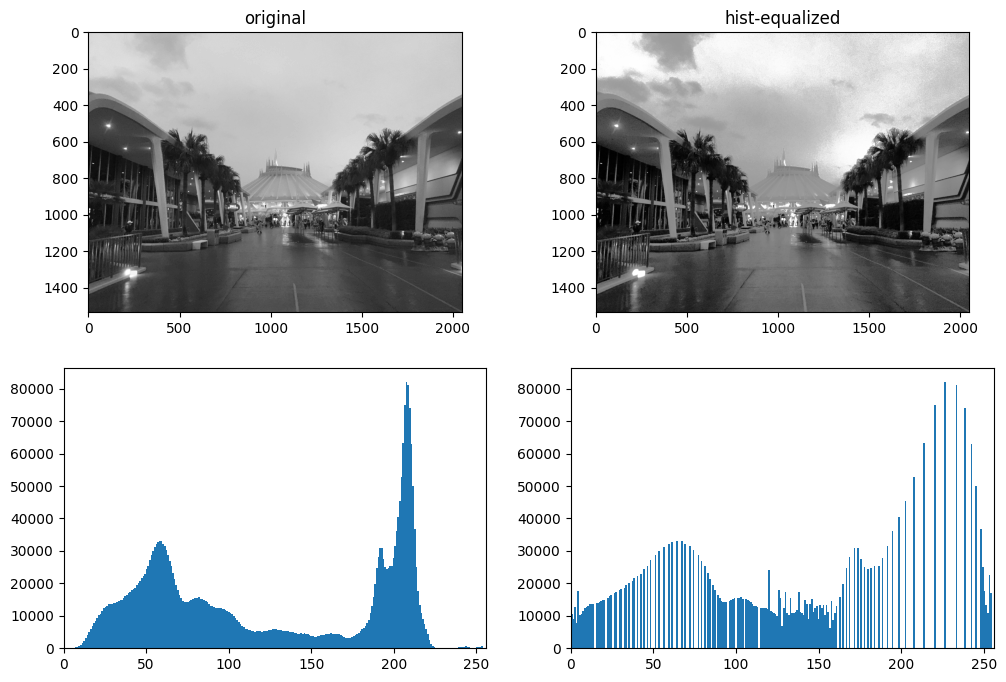

In [60]:
# ヒストグラム平坦化してみる
img = np.array(Image.open('../imgs/spaceMountain.jpeg').convert('L'))
im2, cdf = histeq(img)

plt.figure(figsize=(12,8))
plt.gray()

plt.subplot(2,2,1)
plt.imshow(img)
plt.title('original')

plt.subplot(2,2,2)
plt.imshow(im2)
plt.title('hist-equalized')

plt.subplot(2,2,3)
plt.hist(img.flatten(), 256)
plt.xlim(0,256)

plt.subplot(2,2,4)
plt.hist(im2.flatten(), 256)
plt.xlim(0,256)

plt.show()

### 平均画像

平均化、画像のノイズを低減させる

全て足し合わせて画像数で割る

In [65]:
def compute_average(imlist):
    """画像列の平均を求める"""
    # 最初の画像を開き、浮動小数点数の配列に変換する
    averageim = np.array(Image.open(imlist[0]), 'f')

    for imname in imlist[1:]:
        try:
            averageim += np.array(Image.open(imname))
        except:
            print(imname, '...skipped')
    averageim /= len(imlist)

    # 平均をuint8に変換する
    return np.array(averageim, 'uint8')

### 画像の主成分分析
主成分分析(PCA)は次元を削減するのに便利、少ない次元数で表現するのに適している

画像にPCAを適応するにはflatten()メソッドを使って1次元ベクトルに変換する必要がある

主成分を分析する前に各業を平均画像からの相対値に変換する、また主成分を計算するには特異値分析(SVD)を用いる  
時間がかかるため今回ハウ藁技を使う

In [73]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def pca(x):
    """主成分分析
    入力：x、訓練データを平板化配列を行として格納した行列
    出力：写像行列（次元の重要度順）、分散、平均
    """

    # 次元数を取得
    num_data, dim = x.shape

    # データをセンタリング
    mean_x = x.mean(axis=0)
    x = x - mean_x

    if dim > num_data:
        # pca
        # 共分散行列
        M = np.dot(x,x.T)

        # 固有値と固有ベクトル
        e, EV = np.linalg.eigh(M)
        tmp = np.dot(x.T, EV).T
        V = tmp[::-1] # 反転
        S = np.sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:,i]  /= S

    else:
        # PCA
        U, S, V = np.linalg.svd(x)
        V = V[:num_data]
    
    return V, S, mean_x

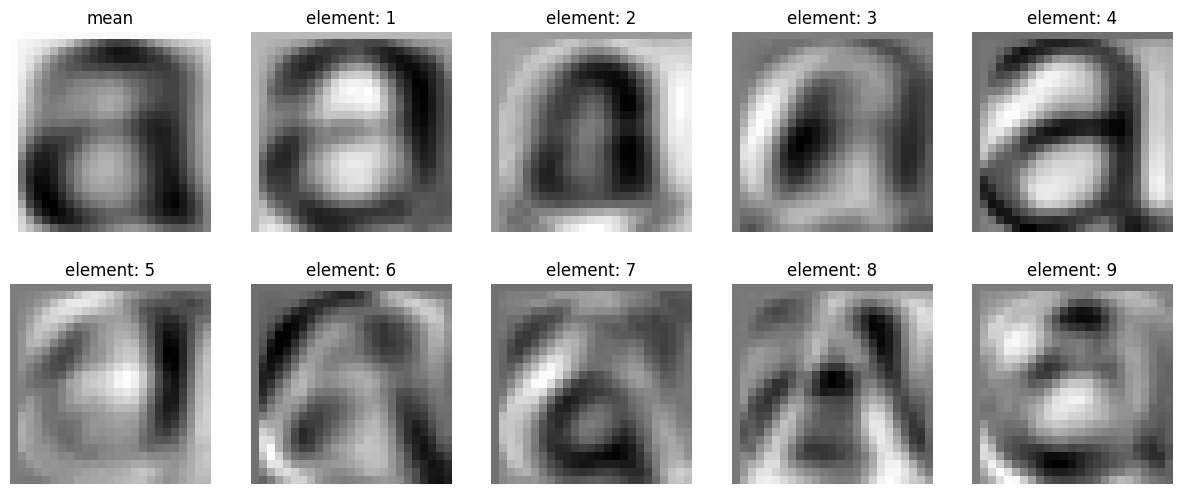

In [76]:
def get_imlist(path):
    """    Returns a list of filenames for
        all jpg images in a directory. """
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg')]

# 主成分分析

imlist = get_imlist('../data/a_thumbs')

img = np.array(Image.open(imlist[0]))
m, n = img.shape[0:2]   # 画像のサイズを得る
imnbr = len(imlist)

# 全ての平板化画像を格納する行列を作る
imMatrix = np.array([np.array(Image.open(im)).flatten() for im in imlist], 'f')

# 主成分分析の実行
V, S, immean = pca(imMatrix)

# 画像を表示する（平均と、最初の7つの主成分）
plt.figure(figsize=(15,6))
plt.gray()
plt.subplot(2,5,1)
plt.imshow(immean.reshape(m,n))
plt.axis('off')
plt.title('mean')
for i in range(9):
    plt.subplot(2,5, i+2)
    plt.imshow(V[i].reshape(m,n))
    plt.axis('off')
    cap = 'element: ' + str(i+1)
    plt.title(cap)
plt.show()


### pickleモジュール

Pythonでデータを後で使いたい時に使うときに使うモジュール(漬物)


In [77]:
import pickle

# 平均と主成分を保存する
f = open('../data/font_pca_modes.pkl', 'wb')
pickle.dump(immean,f)
pickle.dump(V,f)
f.close()

In [79]:
# 読み込んだpickleを取り出す
import pickle

f = open('../data/font_pca_modes.pkl', 'rb')
immean = pickle.load(f)
V = pickle.load(f)
f.close()

# 確認
print(immean[:5])

[252.89233 251.91225 252.43747 252.00381 251.92667]
